In [4]:
def square(x):
    return x*x
f = square
print(f(5))
print(f)

25
<function square at 0x7ff3e80a59e0>


In [6]:
                         ##ASSIGNMENT IS THE MASTER , IF YOU WANNA MASTER THE POINTERS IN PYTHON##
##practicing function behaviors as you pass parameters through a function##
def func(l):
    print(id(l))
    l = l + ["a",]
    print(id(l))
    myList = [1,2,3,4]
    print(id(myList)) 
    func(myList)
    print(myList)

##mutablity DOESN'T play any role here##
##if you have assigned the variable to some other memory location by using assignment operator then the reference##
##to the orginal variable is lost##

140036740401104
140036740401104
140036502394912
[1, 2, 3, 4]


In [12]:
##every object has a name which is a pointer to that object##
##to make a copy of an object is quite a difficult task,use a function called copy##
##which copies the object but the pointers to the content object are same##
##SO it wont work in list of lists and such complex structures##
##that is why we use deepcopy in such case##
import copy
a = [[1,2,3],[11,22,33]]
b = copy.deepcopy(a)
b[1].append('c')
print(id(b))
print(b)
print(id(a))
print(a)
print("Printing id of elements of the lists->")
print(id(a[0]))
print(id(b[0]))



140036739979136
[[1, 2, 3], [11, 22, 33, 'c']]
140036739979456
[[1, 2, 3], [11, 22, 33]]
Printing id of elements of the lists->
140036740016320
140036739979536


In [1]:
#nn.module includes the blocks computational graph
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import sys
import time

In [2]:
np.arange(5)
##torch.cat() practice##
#a = torch.ones((132,64))
#b = torch.zeros((132,3))
#c = torch.cat((a,b),dim=1)
print(c.shape)


torch.Size([132, 67])


In [23]:
##ZIP practice##
ones_ok = torch.ones((10,2))
zeros_ok = torch.zeros((10,3))
for tog in zip(ones_ok,zeros_ok):
    print(tog)


(tensor([1., 1.]), tensor([0., 0., 0.]))
(tensor([1., 1.]), tensor([0., 0., 0.]))
(tensor([1., 1.]), tensor([0., 0., 0.]))
(tensor([1., 1.]), tensor([0., 0., 0.]))
(tensor([1., 1.]), tensor([0., 0., 0.]))
(tensor([1., 1.]), tensor([0., 0., 0.]))
(tensor([1., 1.]), tensor([0., 0., 0.]))
(tensor([1., 1.]), tensor([0., 0., 0.]))
(tensor([1., 1.]), tensor([0., 0., 0.]))
(tensor([1., 1.]), tensor([0., 0., 0.]))


In [10]:
##learning to print ##
for i in range(5):
    print("\r",i,end="")
    time.sleep(1)

 4

In [33]:
for i in range(5):
    print(i)
    #sys.stdout.flush()
    time.sleep(.001)


0
1
2
3
4


0.0
0.5
1.5
2.5
3.5


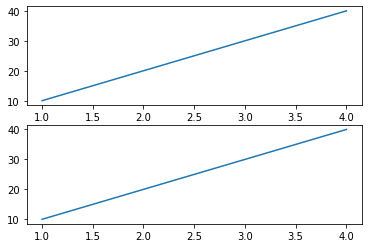

In [18]:
from collections import deque
a = deque([],maxlen=2)
for i in range(5):
    a.append(i)
    print(np.mean(a))

plt.subplot(211)
plt.plot([1,2,3,4],[10,20,30,40])
plt.subplot(212)
plt.plot([1,2,3,4],[10,20,30,40])


In [1]:
"""
	This file contains a neural network module for us to
	define our actor and critic networks in PPO.
"""

import torch
from torch import nn
import torch.nn.functional as F
import numpy as np

class FeedForwardNN(nn.Module):
	"""
		A standard in_dim-64-64-out_dim Feed Forward Neural Network.
	"""
	def __init__(self, in_dim, out_dim):
		"""
			Initialize the network and set up the layers.

			Parameters:
				in_dim - input dimensions as an int
				out_dim - output dimensions as an int

			Return:
				None
		"""
		super(FeedForwardNN, self).__init__()

		self.layer1 = nn.Linear(in_dim, 64)
		self.layer2 = nn.Linear(64, 64)
		self.layer3 = nn.Linear(64, out_dim)

	def forward(self, obs):
		"""
			Runs a forward pass on the neural network.

			Parameters:
				obs - observation to pass as input

			Return:
				output - the output of our forward pass
		"""
		# Convert observation to tensor if it's a numpy array
		if isinstance(obs, np.ndarray):
			obs = torch.tensor(obs, dtype=torch.float)

		activation1 = F.relu(self.layer1(obs))
		activation2 = F.relu(self.layer2(activation1))
		output = self.layer3(activation2)

		return output


In [28]:
actor = FeedForwardNN(3,4)
actor.layer1.weight.data.uniform_(0,1.0)
print(actor.layer1.weight.data.shape)##attribute##
print(actor.layer1.weight.data.size())##method to access the attribute##
dim = actor.layer1.weight.data.shape[0]
mag_num  = 1.0 /(torch.sqrt(torch.tensor(dim)))
actor.layer1.weight.data.uniform_(*(-mag_num,mag_num))
print(actor.layer1.weight.data)

torch.Size([64, 3])
torch.Size([64, 3])
tensor([[-0.0682,  0.1105, -0.0034],
        [-0.1133, -0.0590, -0.0779],
        [-0.0527, -0.0489, -0.0689],
        [ 0.0757,  0.1129,  0.1109],
        [-0.0943, -0.0445,  0.0223],
        [ 0.0285, -0.0187, -0.0256],
        [-0.0162, -0.1226,  0.0319],
        [ 0.0225,  0.1029,  0.0944],
        [-0.0925,  0.0200,  0.0218],
        [-0.0387,  0.0656, -0.0699],
        [-0.0156,  0.0410,  0.0158],
        [ 0.0253, -0.0818,  0.0989],
        [-0.0744,  0.0631, -0.0913],
        [ 0.0592,  0.0929,  0.0885],
        [-0.1205,  0.1126,  0.0893],
        [ 0.0838,  0.0755, -0.0779],
        [-0.1116,  0.0247, -0.0940],
        [-0.0999,  0.0573,  0.0376],
        [ 0.0959, -0.0810,  0.0409],
        [-0.0835,  0.0392,  0.1219],
        [ 0.1245,  0.0478, -0.0871],
        [ 0.0610, -0.0076,  0.1100],
        [ 0.0350, -0.0401, -0.0253],
        [ 0.1195, -0.0811, -0.0827],
        [-0.0954, -0.1152,  0.0286],
        [-0.1031, -0.0015, -0.1181]

In [43]:
#actor.layer1.weight.data.uniform_(0,1)
#e here definately refers  to 10^sth
print(1e2)
##why do np.vstack instead of np.array##
print(np.array([i for i in range(5)]).shape)
print(np.vstack([i for i in range(5)]).shape)
from collections import deque
a = deque([],maxlen=3)
for i in range(10):
    a.append(i)
    print(a)

print(a)

b = deque(maxlen=3)
for i in range(10):
    b.append(i)
    print(b)

100.0
(5,)
(5, 1)
deque([0], maxlen=3)
deque([0, 1], maxlen=3)
deque([0, 1, 2], maxlen=3)
deque([1, 2, 3], maxlen=3)
deque([2, 3, 4], maxlen=3)
deque([3, 4, 5], maxlen=3)
deque([4, 5, 6], maxlen=3)
deque([5, 6, 7], maxlen=3)
deque([6, 7, 8], maxlen=3)
deque([7, 8, 9], maxlen=3)
deque([7, 8, 9], maxlen=3)
deque([0], maxlen=3)
deque([0, 1], maxlen=3)
deque([0, 1, 2], maxlen=3)
deque([1, 2, 3], maxlen=3)
deque([2, 3, 4], maxlen=3)
deque([3, 4, 5], maxlen=3)
deque([4, 5, 6], maxlen=3)
deque([5, 6, 7], maxlen=3)
deque([6, 7, 8], maxlen=3)
deque([7, 8, 9], maxlen=3)


In [6]:
from torch.distributions import Categorical
cat = Categorical(torch.tensor([0.2,0.5,0.1,0.2]))
m = cat.sample()

print(m)
print(cat.log_prob(torch.tensor(m)))

tensor(1)
tensor(-0.6931)


In [44]:
a = torch.full((3,),0.5)
torch.diag(a,0)

tensor([[ 0.5000,  0.0000,  0.0000],
        [ 0.0000,  0.5000,  0.0000],
        [ 0.0000,  0.0000,  0.5000]])

In [7]:
torch.clamp(torch.tensor([1,2,3,4]),min=2,max=3)

tensor([2, 2, 3, 3])

In [29]:
class Net(nn.Module):#under nn_module class parameters are tracked for gradient calculation
    def __init__(self,in_layers,out_layers):
        super(Net,self).__init__()
        self.in_layers = in_layers
        self.out_layers = out_layers
        self.fc1 = nn.Linear(self.in_layers,32)
        self.fc2 = nn.Linear(32,32)
        self.fc3 = nn.Linear(32,out_layers)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [30]:
net = Net(in_layers=1,out_layers=1)

In [31]:
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [38]:
x = torch.ones((100,1))#whatever you enter first dimension it takes it as a batch
y = net(x)#here it means 100 in a batch and 1 input for each example 
print(y.shape)#ouput also in same format batch * num_out_layers

torch.Size([100, 1])


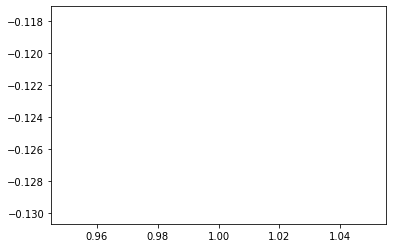

In [39]:
plt.plot(x.detach().numpy(),y.detach().numpy())

In [44]:
#from numpy to pytorch -> #torch.sigmoid / torch.relu / torch.softmax
x = np.random.randint((1,2))
print(x.dtype)
x = torch.from_numpy(x)
print(x.dtype)
#from pytorch to numpy
x = x.numpy()
print(x.dtype)

int64
torch.int64
int64


In [46]:
#gradients and backprop
X = torch.tensor([1.,2.,3.],requires_grad = True) #default value of requires_grad is False for pytorch tensor
Y = torch.ones((3,),requires_grad=True)

In [47]:
print(X)

tensor([1., 2., 3.], requires_grad=True)


In [48]:
print(X.data)#since requires grad is True here keeps track of data and grad as attribute
print(X.grad)#gradient none since not backpropagated yet

tensor([1., 2., 3.])
None


In [49]:
loss = ((X - Y)**2).sum() 

In [50]:
print(loss)

tensor(5., grad_fn=<SumBackward0>)


In [51]:
print(loss.grad_fn)

In [52]:
loss.backward()

In [53]:
print(X.grad)

tensor([0., 2., 4.])


In [54]:
print(Y.grad)

tensor([-0., -2., -4.])


In [55]:
#main thing to note is it goes on tracking the variables with requires_grad = True and
#builds a computation graph out of them whenever we do sth.backward() the var.grad of the
#variable with requires_grad=True is filled with gradient w.r.t sth

In [56]:
#another important thing to keep note of is gradients accumulate in pytorch.
#That means calling sth.backward() many times on the same computation graph is just gonna 
#the same gradient as many times as you call them
#It is mostly useful when you have many loss functions as depending on the same variable 
#and when you backpropagate you wanna make sure that the gradients from both the loss 
#functions are considered by the variable on the computation graph.
#you can do this by calling loss.backward() and other_loss.backward() 

In [57]:
#what if you want to perform a calculation with the variable whose requires_gradient = True
#but you want want it to be in the computation graph for gradient calculation
print(X)

tensor([1., 2., 3.], requires_grad=True)


In [58]:
print(X.detach())#see the difference 

tensor([1., 2., 3.])


In [60]:
print(X.detach().grad)#see no grad tracked for this; you can use this for prediction
print(X.grad)

None
tensor([0., 2., 4.])


In [61]:
#but X.detach() and X use the same memory space so mutating X.detach() mutates X whose 
#gradients are tracked so performing mutating operation on X.detach() pops err 
#to use a different memory location completely we can do X.detach().clone()
X_detached = X.detach().clone()

In [63]:
for name,p in net.named_parameters():
    print(name,p.shape)

fc1.weight torch.Size([32, 1])
fc1.bias torch.Size([32])
fc2.weight torch.Size([32, 32])
fc2.bias torch.Size([32])
fc3.weight torch.Size([1, 32])
fc3.bias torch.Size([1])


In [64]:
for p in net.parameters():
    print(p.shape)

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


In [70]:
X = torch.from_numpy(np.random.randn(1000,1)).to(torch.float32)
Y_target = torch.sin(X)

In [71]:
for _ in range(1000):
    Y = net(X)
    loss = ((Y_target - Y)**2).sum()
    loss.backward()
    for p in net.parameters():
        p.data.add_(-0.001 * p.grad)
    p.grad.data.zero_()

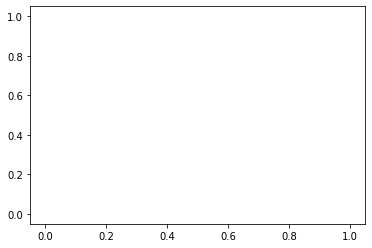

In [73]:
Y = net(X)
plt.plot(X.detach().numpy(),Y.detach().numpy())

In [75]:
#the same thing done in a more general way
x = torch.linspace(-5,5,100).view(-1,1)
y_target = torch.sin(x)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(),lr=1e-3)

In [78]:
for _ in range(1000):
    y = net(x)
    loss = loss_fn(y,y_target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

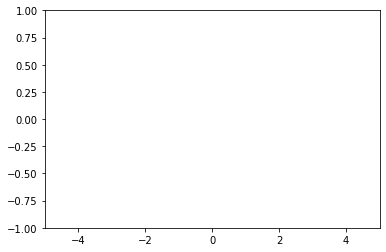

In [83]:
print(y)
plt.plot(x.detach().numpy(),y.detach().numpy())
plt.xlim([-5,5])
plt.ylim([-1,1])
plt.show()

In [84]:
#availabiltiy of GPU and its use is easy in pytorch
print(torch.cuda.is_available())

False


In [85]:
device = torch.device("cuda")

In [86]:
torch.ones((2,3),device=device)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
#In order to perform operations in the variables all of them must defined using same thing 
#i.e both CPU or GPU
device = torch.device("cuda")
x = torch.ones((2,3),device = device) #defined x in GPU
y = torch.ones((2,3)) #defined on CPU
Z = x + y #err because both are not defined for same machine
#we can do
y = y.to(device)
Z = x + y #now on same devi
ce

#OR
Z = x.to("cpu") + y.to("cpu")#taking both to CPU
#you can move your evrything to GPU to work faster 
net = net.to(device)
y_target = y_target.to(device)

In [ ]:
#cannot convert directly from gpu to numpy or numpy to gpu
#first numpy to cpu to GPU
#OR GPU to cpu to numpy
X = X.to("cpu").numpy()
X = X.to("cpu").to(device)

In [ ]:
net.eval()#changes the mode of the net from training to evaluation mode
#is helpful when we have performed dropout and batchnorm during training which we don't perform
#test time
with torch.no_grad():#means keep no track of grad below this requires_grad = False
    y = net(x)
    #had we not made requires_grad False it wouldn't matter here But its a good idea to follow
    
    

In [1]:
#to save the weights and biases for future prediction
path = "checkpoint.pt"#save the path of the file for saving the weights and biases
torch.save(net.state_dict(),path)

#now load this parameters into the new model
newModel = Net(1,1)
newModel.load_state_dict(torch.load(path))
newModel.eval()

NameError: name 'torch' is not defined